*Lucas De Vrieze - r0665032*

In [1]:
library("DESeq2")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min



Attaching package: ‘S4Vectors’


The

In [2]:
setwd("/home/luna.kuleuven.be/r0665032/data/jupyternotebooks/assignment/DESeq2")

In [3]:
countsFile = path.expand("/home/luna.kuleuven.be/r0665032/data/jupyternotebooks/assignment/bash/gene.counts.tsv")

In [4]:
counts = as.matrix(read.csv(countsFile, sep="\t", row.names="Geneid"))
head(counts)
dim(counts)

,..mapping.E1.bam,..mapping.E2.bam,..mapping.E3.bam,..mapping.C1.bam,..mapping.C2.bam,..mapping.C3.bam
lncRNA:CR40469,1094,1084,1349,923,737,1030
CG17636,5,2,7,1,3,0
RhoGAP1A,4153,4285,4169,3896,4118,4181
mir-4915,4,2,2,1,2,1
tyn,439,445,462,403,400,396
lncRNA:CR45473,343,331,357,309,294,316


[1] 17558     6

In [5]:
colnames(counts) = c("E1", "E2", "E3", "C1", "C2", "C3")
head(counts)

,E1,E2,E3,C1,C2,C3
lncRNA:CR40469,1094,1084,1349,923,737,1030
CG17636,5,2,7,1,3,0
RhoGAP1A,4153,4285,4169,3896,4118,4181
mir-4915,4,2,2,1,2,1
tyn,439,445,462,403,400,396
lncRNA:CR45473,343,331,357,309,294,316


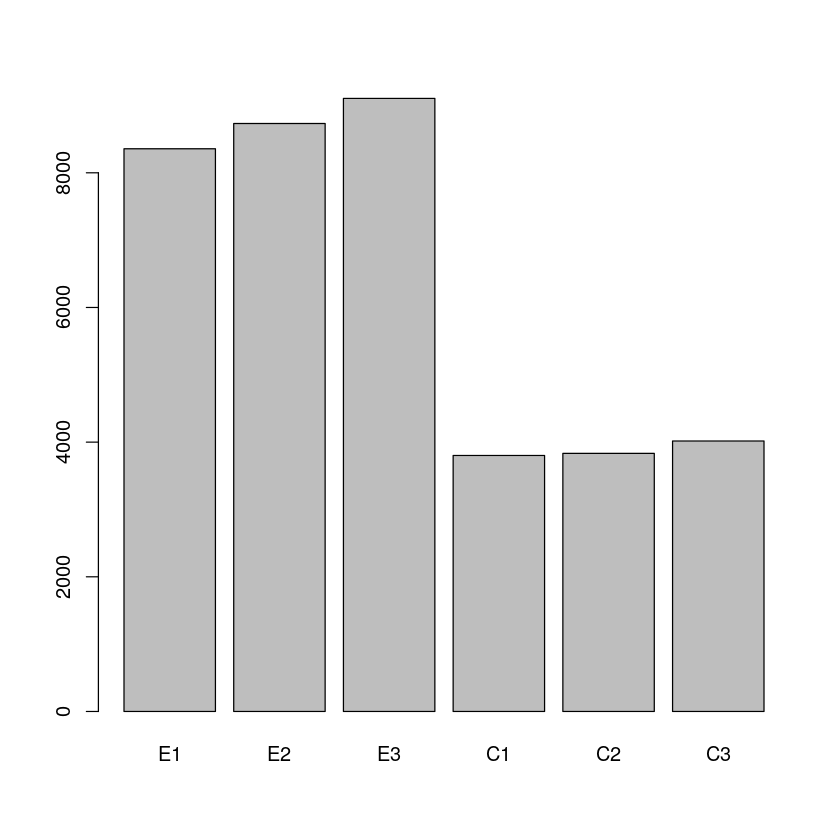

In [6]:
barplot(counts['Ir75a',])

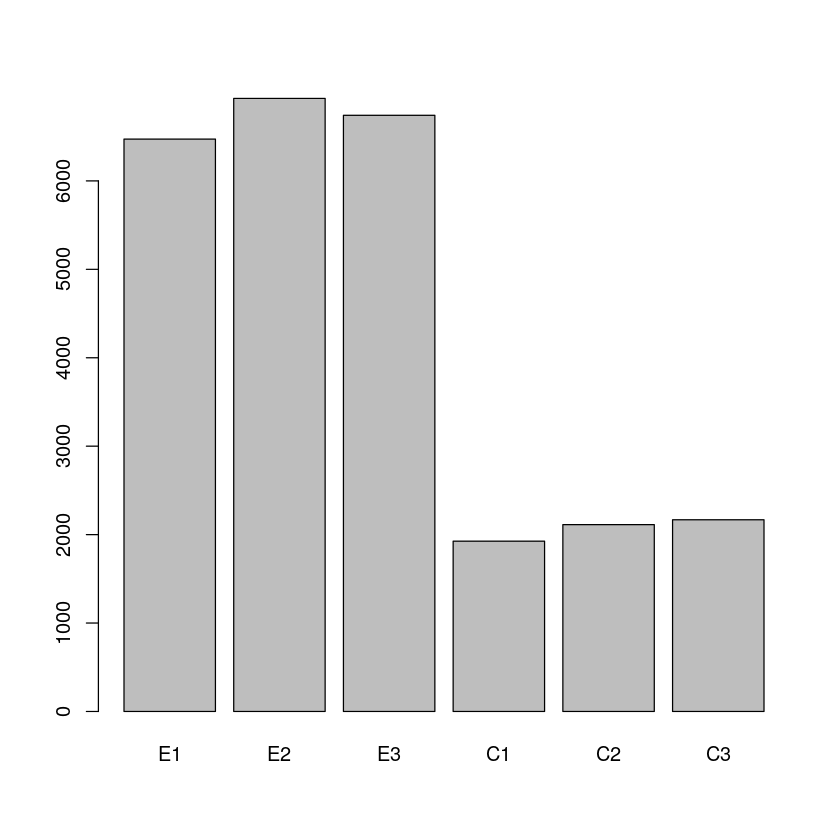

In [7]:
barplot(counts['Ir75b',])

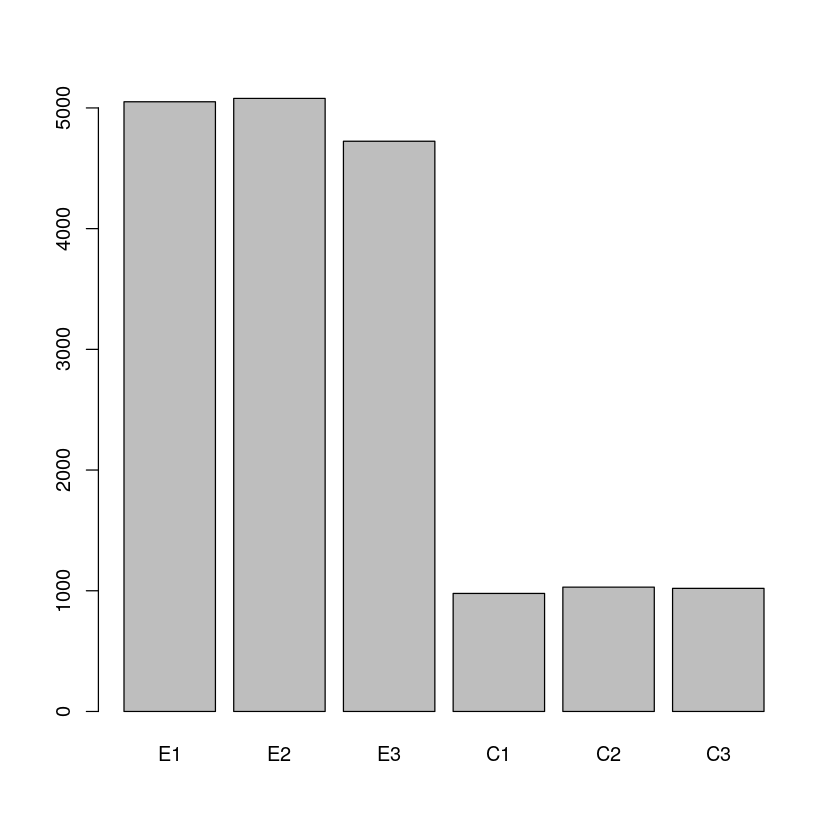

In [8]:
barplot(counts['Ir75c',])

Clearly different, but in case Ir75a and -b, I would expect the opposite as it was hypothesised that E93 promotes Ir75a and -b. So without E93, there should be (close to) no transcripts.

The Ir75c case aligns with the hypothesised derepression.

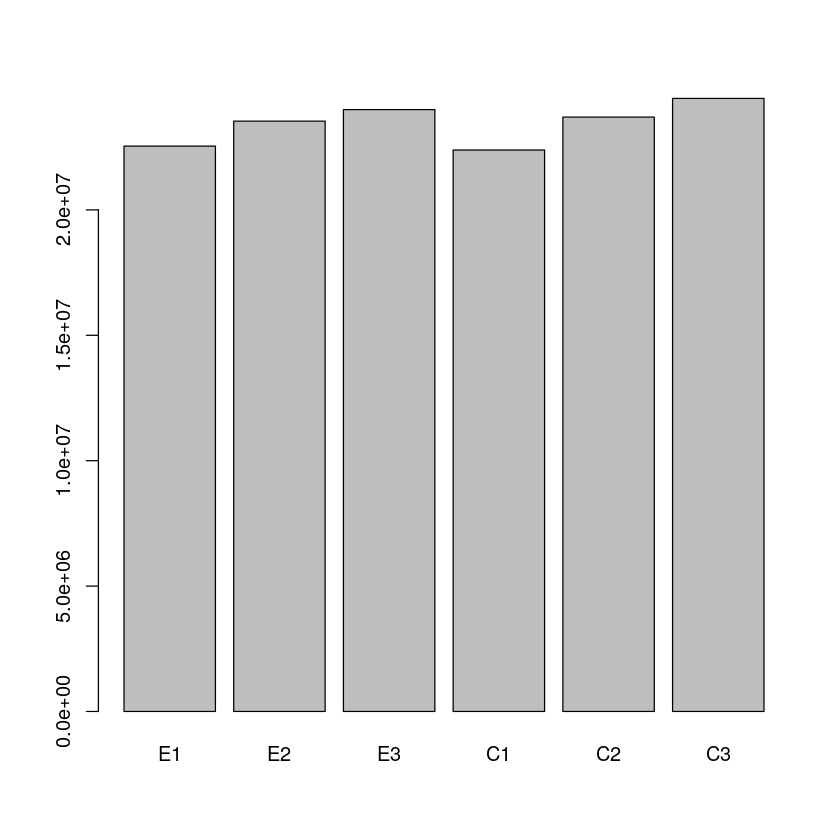

In [9]:
barplot(colSums(counts))

It's not because of a different number of reads per sample.

In [10]:
condition = factor(c("E", "E", "E", "C", "C", "C"))

In [11]:
colData = data.frame(sampleName = c("E1", "E2", "E3", "C1", "C2", "C3"), condition = condition)
colData

sampleName,condition
<fct>,<fct>
E1,E
E2,E
E3,E
C1,C
C2,C
C3,C


In [12]:
dds = DESeqDataSetFromMatrix(countData = counts, colData = colData, design = ~ condition)
colnames(dds) = colnames(counts)
dds

class: DESeqDataSet 
dim: 17558 6 
metadata(1): version
assays(1): counts
rownames(17558): lncRNA:CR40469 CG17636 ... trnV srRNA
rowData names(0):
colnames(6): E1 E2 ... C2 C3
colData names(2): sampleName condition

In [13]:
dds = DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



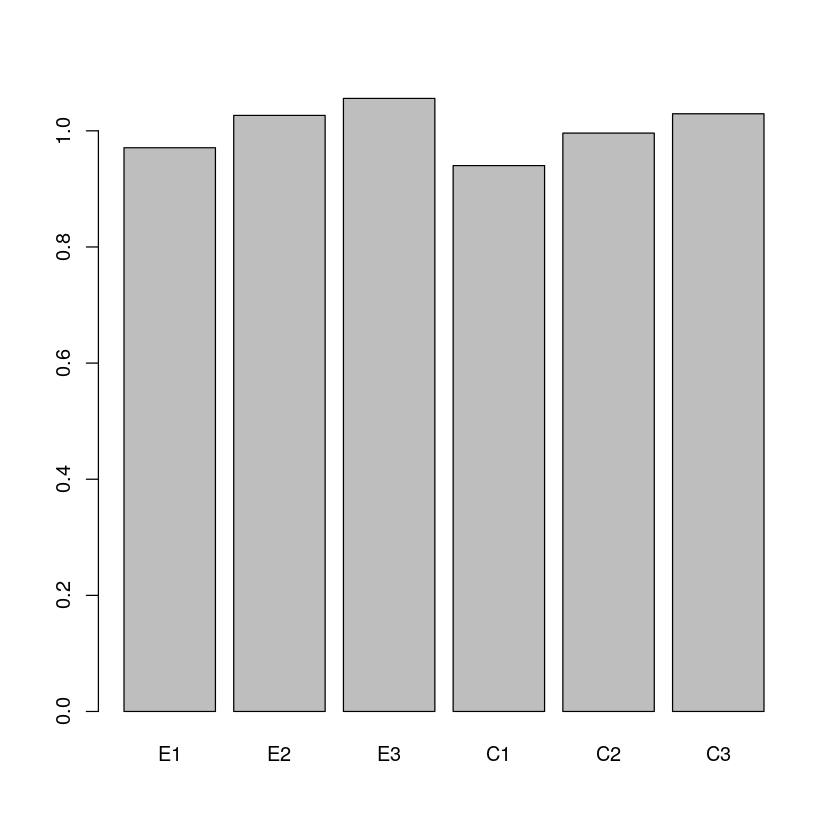

In [14]:
barplot(sizeFactors(dds))

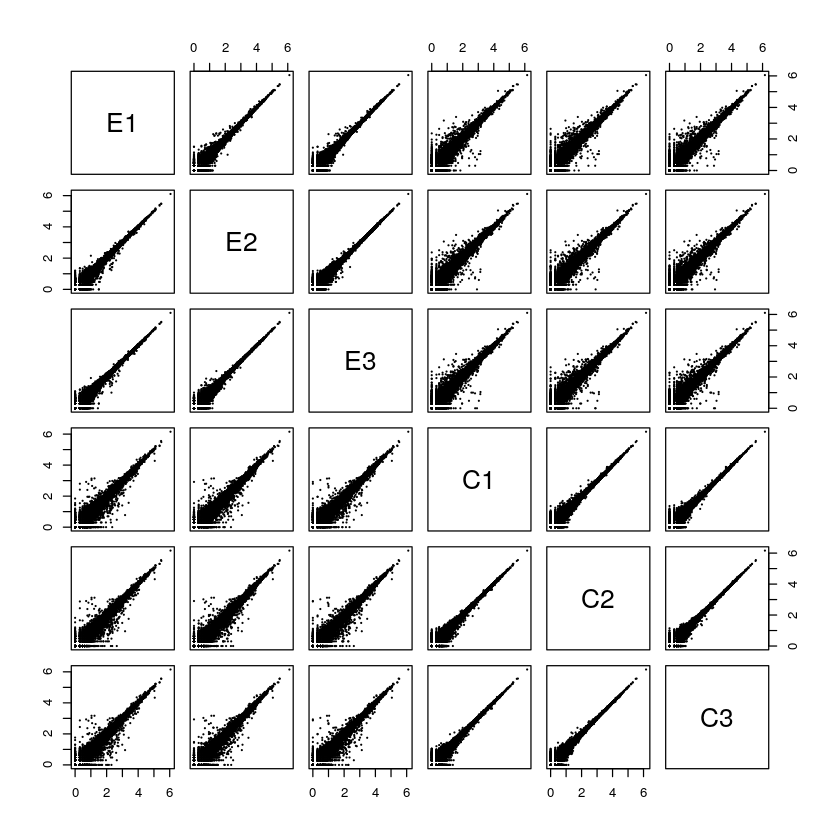

In [15]:
plot(data.frame(log10(counts(dds))), cex=0.1)

The replicate samples of the two conditions show a mutually sharp profile, indicating the replicates agree. At the other hand, the test-control comparisons display a more blurred profile, indicating the presence of differently expressed genes.

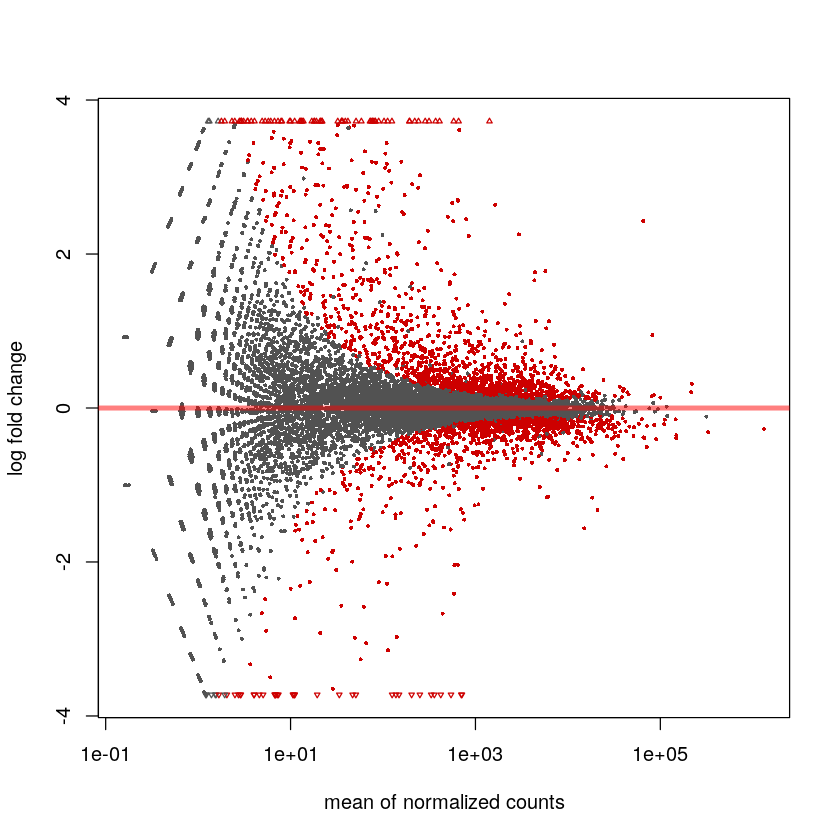

In [16]:
plotMA(dds)

A clear confirmation of the existence of significantly differently expressed genes

In [17]:
res = results(dds)
res = res[order(res$padj),]
head(res, n=500)

log2 fold change (MLE): condition E vs C 
Wald test p-value: condition E vs C 
DataFrame with 500 rows and 6 columns
                baseMean     log2FoldChange              lfcSE
               <numeric>          <numeric>          <numeric>
w       65509.3365387925   2.42722201838791 0.0447403998503378
Obp56c  1418.57116077282   5.78517352214326  0.137487501262829
Ir75c   2948.10584960657   2.25429800311185 0.0657824006859749
Ir75b   4346.85683255441   1.65772490886252 0.0505175076103049
CG32260  668.73251376538   3.60913884613968  0.114818427186584
...                  ...                ...                ...
CG30419 161.384571722086    1.0148368540949  0.159551427258848
ppk19   121.771900666114  -1.17037108112752  0.184219170016184
Obp44a  306.195191927458   2.30096822111367  0.363250311194626
zfh1    384.852661211881  0.764797537143132  0.120887441424448
CG6484  306.070902680912 -0.804081396500358  0.127178980550271
                     stat                pvalue                 

In [18]:
res[c('Ir75a', 'Ir75b', 'Ir75c'),]

log2 fold change (MLE): condition E vs C 
Wald test p-value: condition E vs C 
DataFrame with 3 rows and 6 columns
              baseMean   log2FoldChange              lfcSE             stat
             <numeric>        <numeric>          <numeric>        <numeric>
Ir75a 6255.03429679533 1.12582328259824 0.0454777157202005 24.7554932073726
Ir75b 4346.85683255441 1.65772490886252 0.0505175076103049 32.8148593879633
Ir75c 2948.10584960657 2.25429800311185 0.0657824006859749 34.2690138943572
                     pvalue                  padj
                  <numeric>             <numeric>
Ir75a 2.70554037376172e-135 2.88478242352343e-132
Ir75b 3.61461123168867e-236 1.15622376773641e-232
Ir75c 2.27238427460699e-257  9.6917189311988e-254

All three Ir75 genes are significantly upregulated, which is surprising given the RNAi setting.

In [19]:
res.diff = res[!is.na(res$padj) & res$padj<0.01,]
dim(res.diff)

[1] 1618    6

The padj value of the 500 most significantly expressed genes is not even higher than 1e-6. In order to capture the most relevant genes, it can be useful here to be more stringent and use a significance level of 0.01.

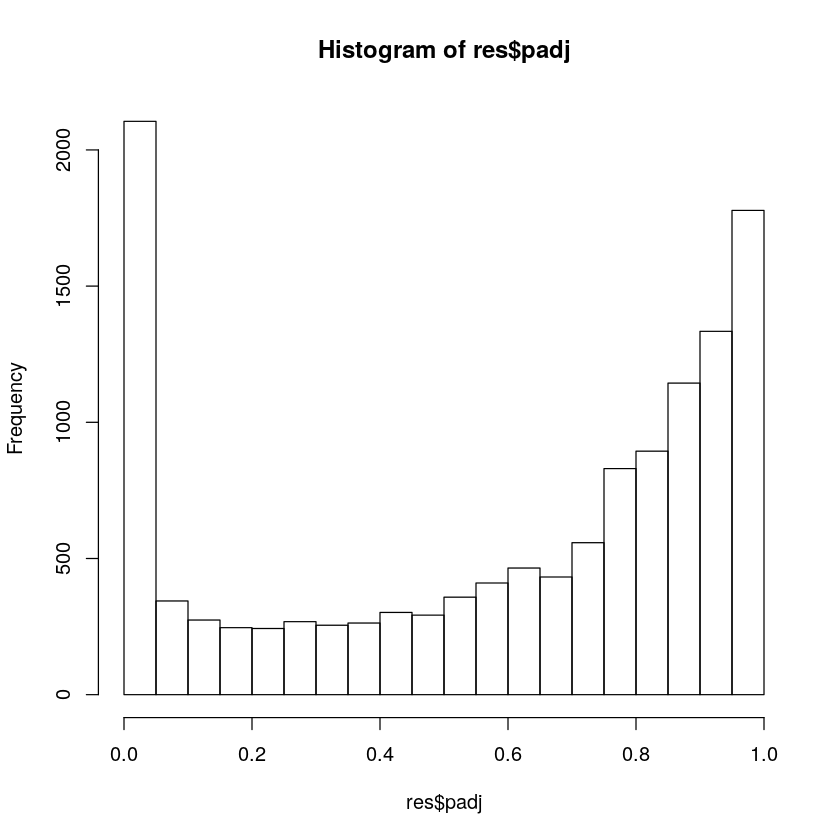

In [20]:
hist(res$padj)

The significant differences are not just a (heavy) tail of a (broad) distribution.

In [21]:
write.table(res, "DESeq.results.tsv", sep="\t", col.names=NA, quote=F)

In [22]:
diff.genes = sort(rownames(res.diff))
diff.genes

[1] "2mit"                              "5-HT2B"                           
   [3] "a5"                                "AANAT1"                           
   [5] "ABCA"                              "ABCD"                             
   [7] "Abl"                               "Ac13E"                            
   [9] "Ac78C"                             "ACC"                              
  [11] "Acf"                               "Achl"                             
  [13] "Acox57D-p"                         "Act79B"                           
  [15] "ACXD"                              "Adgf-C"                           
  [17] "Adh"                               "Adhr"                             
  [19] "ADPS"                              "Agpat3"                           
  [21] "Akap200"                           "Aldh"                             
  [23] "Aldh-III"                          "Alp4"                             
  [25] "alpha-Est1"                        "alpha-Est10"                      
  [27] "alpha-Est7"                        "alpha-Est8"                       
  [29] "alpha-Est9"                        "alpha-Man-IIb"                    
  [31] "amd"                               "amon"                             
  [33] "Amt"                               "ana"                              
  [35] "Ance-3"                            "anchor"                           
  [37] "Ank2"                              "antdh"                            
  [39] "AOX1"                              "AOX3"                             
  [41] "Arc1"                              "Arc2"                             
  [43] "Argk"                              "ArgRS-m"                          
  [45] "AsnS"                              "asp"                              
  [47] "Asph"                              "AspRS"                            
  [49] "asRNA:CR31514"                     "asRNA:CR43467"                    
  [51] "asRNA:CR43481"                     "asRNA:CR43609"                    
  [53] "asRNA:CR43916"                     "asRNA:CR43959"                    
  [55] "asRNA:CR44035"                     "asRNA:CR44107"                    
  [57] "asRNA:CR44169"                     "asRNA:CR44237"                    
  [59] "asRNA:CR44431"                     "asRNA:CR44512"                    
  [61] "asRNA:CR44704"                     "asRNA:CR44807"                    
  [63] "asRNA:CR45124"                     "asRNA:CR45131"                    
  [65] "asRNA:CR45133"                     "asRNA:CR45141"                    
  [67] "asRNA:CR45167"                     "asRNA:CR45271"                    
  [69] "asRNA:CR45528"                     "asRNA:CR45682"                    
  [71] "asRNA:CR45712"                     "asRNA:CR45807"                    
  [73] "asRNA:CR45822"                     "asRNA:CR45875"                    
  [75] "asRNA:CR45960"                     "asRNA:CR45974"                    
  [77] "asRNA:CR46067"                     "asRNA:CR46071"                    
  [79] "asRNA:CR46136"                     "asRNA:CR46262"                    
  [81] "asRNA:CR46263"                     "asRNA:CR46473"                    
  [83] "asRNA:CR46479"                     "asRNA:CR46485"                    
  [85] "asRNA:Eig63F-2"                    "Atf3"                             
  [87] "ATP6"                              "ATP6AP2"                          
  [89] "ATP8"                              "ATP8B"                            
  [91] "ATPsynbeta"                        "ATPsynC"                          
  [93] "ATPsynCF6"                         "ATPsyndelta"                      
  [95] "ATPsynG"                           "ATPsynO"                          
  [97] "Atx2"                              "axed"                             
  [99] "axo"                               "Axs"                              
 [101] "B4"                                "babos"   

In [23]:
write.table(diff.genes, "diff.genes.txt", col.names=NA, quote=F)

In [24]:
res.up = res[!is.na(res$padj) & res$padj<0.01 & res$log2FoldChange>1,]
dim(res.up)

[1] 305   6

Confirming the Ir75 genes are significantly upregulated. -> Yes, they are in here.

In [25]:
up.genes = sort(rownames(res.up))
up.genes

[1] "2mit"                              "Act79B"                           
  [3] "Adgf-C"                            "Arc1"                             
  [5] "asRNA:CR31514"                     "asRNA:CR43481"                    
  [7] "asRNA:CR44035"                     "asRNA:CR44107"                    
  [9] "asRNA:CR45712"                     "asRNA:CR45974"                    
 [11] "asRNA:CR46473"                     "asRNA:Eig63F-2"                   
 [13] "axed"                              "bib"                              
 [15] "blanks"                            "bnl"                              
 [17] "BomS3"                             "br"                               
 [19] "BthD"                              "Cad74A"                           
 [21] "CBP"                               "CCHa2-R"                          
 [23] "CDase"                             "Cdc6"                             
 [25] "Cep89"                             "CG10175"                          
 [27] "CG10505"                           "CG1077"                           
 [29] "CG11029"                           "CG11318"                          
 [31] "CG1136"                            "CG11378"                          
 [33] "CG1143"                            "CG11670"                          
 [35] "CG11852"                           "CG11889"                          
 [37] "CG11891"                           "CG12470"                          
 [39] "CG12507"                           "CG12869"                          
 [41] "CG12947"                           "CG13002"                          
 [43] "CG13003"                           "CG13033"                          
 [45] "CG13215"                           "CG13330"                          
 [47] "CG13331"                           "CG13375"                          
 [49] "CG13386"                           "CG13408"                          
 [51] "CG13460"                           "CG13616"                          
 [53] "CG13654"                           "CG13707"                          
 [55] "CG13708"                           "CG13894"                          
 [57] "CG13972"                           "CG13996"                          
 [59] "CG14257"                           "CG14397"                          
 [61] "CG14423"                           "CG14518"                          
 [63] "CG14563"                           "CG14572"                          
 [65] "CG14629"                           "CG14669"                          
 [67] "CG14834"                           "CG14960"                          
 [69] "CG15125"                           "CG15128"                          
 [71] "CG15213"                           "CG15353"                          
 [73] "CG15373"                           "CG1545"                           
 [75] "CG15546"                           "CG15617"                          
 [77] "CG15628"                           "CG15784"                          
 [79] "CG16978"                           "CG18258"                          
 [81] "CG18641"                           "CG2070"                           
 [83] "CG2955"                            "CG30203"                          
 [85] "CG30378"                           "CG30419"                          
 [87] "CG31706"                           "CG32260"                          
 [89] "CG32512"                           "CG32564"                          
 [91] "CG32599"                           "CG32645"                          
 [93] "CG33098"                           "CG3348"                           
 [95] "CG33993"                           "CG34227"                          
 [97] "CG34265"                           "CG34327"                          
 [99] "CG34330"                           "CG34355"                          
[101] "CG34382"                           "CG3502"                           
[103] "CG3588"          

In [26]:
write.table(up.genes, "up.genes.txt", col.names=NA, quote=F)

In [27]:
res.down = res[!is.na(res$padj) & res$padj<0.01 & res$log2FoldChange< -1,]
dim(res.down)

[1] 104   6

In [28]:
down.genes = sort(rownames(res.down))
down.genes

[1] "a5"                 "asp"                "asRNA:CR44237"     
  [4] "BomBc3"             "CadN2"              "CCAP"              
  [7] "CCKLR-17D3"         "CG10650"            "CG11000"           
 [10] "CG11380"            "CG11425"            "CG12594"           
 [13] "CG12986"            "CG13594"            "CG13699"           
 [16] "CG14400"            "CG14551"            "CG15169"           
 [19] "CG15186"            "CG15580"            "CG16782"           
 [22] "CG30259"            "CG30447"            "CG3123"            
 [25] "CG31345"            "CG31644"            "CG32447"           
 [28] "CG32750"            "CG33159"            "CG40485"           
 [31] "CG40486"            "CG42246"            "CG42319"           
 [34] "CG42633"            "CG42690"            "CG42691"           
 [37] "CG43195"            "CG43920"            "CG44666"           
 [40] "CG4546"             "CG46465"            "CG6154"            
 [43] "CG6910"             "CG7906"             "CG8560"            
 [46] "CG8654"             "CG8907"             "CG9568"            
 [49] "CheB93b"            "Dh31"               "Dh31-R"            
 [52] "Dh44"               "DIP-lambda"         "Dscam2"            
 [55] "dy"                 "ETHR"               "Fife"              
 [58] "Gr21a"              "Gr33a"              "Gr93a"             
 [61] "hec"                "Hr38"               "Ir84a"             
 [64] "Ir92a"              "Lgr1"               "lncRNA:CR43834"    
 [67] "lncRNA:CR44525"     "lncRNA:CR45382"     "lncRNA:CR45502"    
 [70] "Lrp4"               "Mec2"               "nAChRalpha5"       
 [73] "Nos"                "Obp58b"             "Obp59a"            
 [76] "Obp99a"             "Obp99d"             "Or47b"             
 [79] "Or65a"              "Or65b"              "Or65c"             
 [82] "Or82a"              "Or83c"              "Or85b"             
 [85] "Or88a"              "ppk14"              "ppk15"             
 [88] "ppk19"              "ppk5"               "ppk6"              
 [91] "ppk7"               "Rab27"              "Rgk2"              
 [94] "Rh7"                "scw"                "Sdic2"             
 [97] "slow"               "snoRNA:Me18S-A1806" "tobi"              
[100] "tRNA:Met-CAT-1-5"   "trnR"               "TrpA1"             
[103] "TwdlG"              "unc-13-4A"

In [29]:
write.table(down.genes, "down.genes.txt", col.names=NA, quote=F)

**Conclusion:**

The sequencing data of this study are of high quality and contain clear but surprising contrasts between the two different cases envisioned. Where I would expect the read counts of Ir75a and Ir75b to drop, they increased significantly. The expression of Ir75c, however, aligned with the hypothesised derepression.

The differently expressed genes will be checked for their functional annotation.